In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "data/raw/processed_images"

# Dimensions standardisées
img_height, img_width = 128, 128
batch_size = 32

# Générateurs d'images avec normalisation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{dataset_path}/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binaire
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\hiron\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
import mlflow.keras, time
from tensorflow.keras.callbacks import TensorBoard

# set mlflow experiment
mlflow.set_experiment("cataract_classification")

# create a tensorboard callback
log_dir = f"logs/cnn_{int(time.time())}"
tensorboard_callback = TensorBoard(log_dir=log_dir)

with mlflow.start_run(run_name="CNN_Model_basic"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        callbacks=[tensorboard_callback]
    )

    model.save("cataract_basic_classifier.h5")

2025/04/23 12:20:26 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/23 12:20:26 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
c:\Users\hiron\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 875ms/step - accuracy: 0.5623 - loss: 0.7337 - val_accuracy: 0.7769 - val_loss: 0.5020
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 761ms/step - accuracy: 0.7853 - loss: 0.4952 - val_accuracy: 0.8843 - val_loss: 0.3123
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 737ms/step - accuracy: 0.8340 - loss: 0.3565 - val_accuracy: 0.8926 - val_loss: 0.3389
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 775ms/step - accuracy: 0.8710 - loss: 0.2939 - val_accuracy: 0.9091 - val_loss: 0.2753
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 764ms/step - accuracy: 0.9242 - loss: 0.2134 - val_accuracy: 0.9008 - val_loss: 0.3005
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 759ms/step - accuracy: 0.9238 - loss: 0.1955 - val_accuracy: 0.7934 - val_loss: 0.4481
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 775ms/step - accuracy: 0.9383 - loss: 0.1795 - val_accuracy: 0.9587 - val_loss: 0.2277
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 736ms/step - accuracy: 0.9514 - loss: 0.1194 - val_accu

In [4]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.9649 - loss: 0.1697
Test Accuracy: 0.97


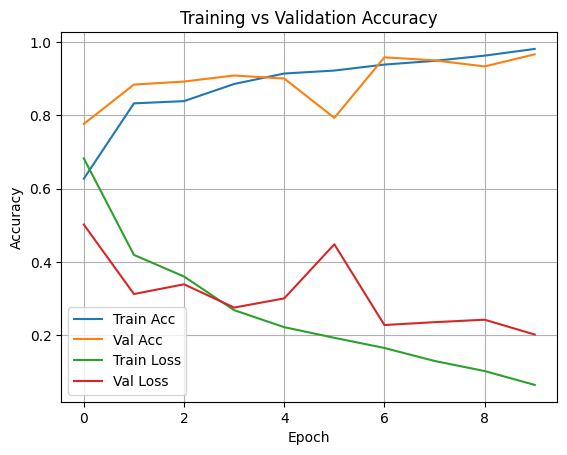

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

ADDING DATA AUGMENTATION & DROPOUT

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train set avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test set juste normalisé
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{dataset_path}/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# model with dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # dropout here
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


c:\Users\hiron\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
with mlflow.start_run(run_name="CNN_Model_with_dropout"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        callbacks=[tensorboard_callback]
    )

    model.save("cataract_classifier_with_dropout.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

2025/04/23 12:22:47 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/23 12:22:47 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
c:\Users\hiron\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 890ms/step - accuracy: 0.5538 - loss: 0.7486 - val_accuracy: 0.6942 - val_loss: 0.6861
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 815ms/step - accuracy: 0.5711 - loss: 0.6695 - val_accuracy: 0.8512 - val_loss: 0.4077
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 812ms/step - accuracy: 0.7346 - loss: 0.4939 - val_accuracy: 0.8264 - val_loss: 0.4262
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 796ms/step - accuracy: 0.8135 - loss: 0.4674 - val_accuracy: 0.7851 - val_loss: 0.4607
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 796ms/step - accuracy: 0.8513 - loss: 0.4004 - val_accuracy: 0.8099 - val_loss: 0.4768
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 790ms/step - accuracy: 0.8363 - loss: 0.4470 - val_accuracy: 0.7025 - val_loss: 0.6884
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 807ms/step - accuracy: 0.7755 - loss: 0.4913 - val_accuracy: 0.8264 - val_loss: 0.4315
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 828ms/step - accuracy: 0.8029 - loss: 0.4743 - val_accu

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 0.8409 - loss: 0.4318
Test Accuracy: 0.87


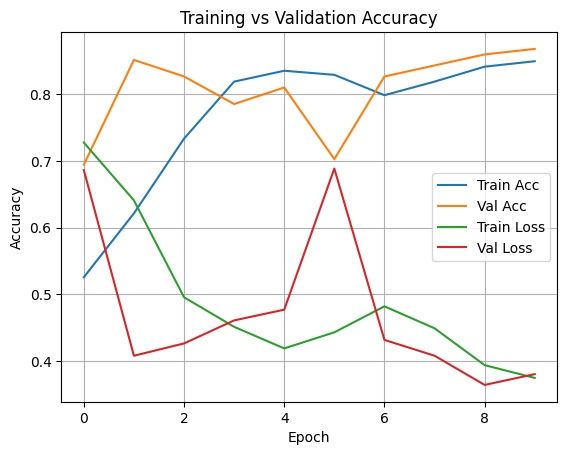

In [8]:

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

MORE EPOCH + EARLY STOPPING

2025/04/23 12:25:13 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/23 12:25:13 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.8292 - loss: 0.4108

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 889ms/step - accuracy: 0.8294 - loss: 0.4100 - val_accuracy: 0.8595 - val_loss: 0.3658
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.8508 - loss: 0.3658

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 807ms/step - accuracy: 0.8507 - loss: 0.3661 - val_accuracy: 0.8678 - val_loss: 0.3612
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.8675 - loss: 0.3557

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 820ms/step - accuracy: 0.8665 - loss: 0.3566 - val_accuracy: 0.8843 - val_loss: 0.3207
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 804ms/step - accuracy: 0.8796 - loss: 0.3267 - val_accuracy: 0.8512 - val_loss: 0.3737
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.8535 - loss: 0.3326

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 833ms/step - accuracy: 0.8538 - loss: 0.3334 - val_accuracy: 0.9091 - val_loss: 0.3173
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 818ms/step - accuracy: 0.8783 - loss: 0.3114 - val_accuracy: 0.8760 - val_loss: 0.3341
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step - accuracy: 0.8529 - loss: 0.3541

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 838ms/step - accuracy: 0.8526 - loss: 0.3543 - val_accuracy: 0.8843 - val_loss: 0.3092
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.8564 - loss: 0.3403

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 817ms/step - accuracy: 0.8563 - loss: 0.3400 - val_accuracy: 0.8678 - val_loss: 0.2999
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - accuracy: 0.8729 - loss: 0.3110

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 856ms/step - accuracy: 0.8727 - loss: 0.3101 - val_accuracy: 0.8512 - val_loss: 0.2839
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 817ms/step - accuracy: 0.8803 - loss: 0.3090 - val_accuracy: 0.8760 - val_loss: 0.3265
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 814ms/step - accuracy: 0.8668 - loss: 0.2779 - val_accuracy: 0.8595 - val_loss: 0.3167
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.8987 - loss: 0.2451

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 816ms/step - accuracy: 0.8982 - loss: 0.2456 - val_accuracy: 0.9174 - val_loss: 0.2483
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 814ms/step - accuracy: 0.8863 - loss: 0.2797 - val_accuracy: 0.9091 - val_loss: 0.2560
Epoch 14/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 819ms/step - accuracy: 0.8950 - loss: 0.2430 - val_accuracy: 0.9091 - val_loss: 0.2504
Epoch 15/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 822ms/step - accuracy: 0.9217 - loss: 0.2005 - val_accuracy: 0.8926 - val_loss: 0.2947
Epoch 16/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 833ms/step - accuracy: 0.8818 - loss: 0.2298 - val_accuracy: 0.9091 - val_loss: 0.2696
Epoch 17/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 832ms/step - accuracy: 0.9251 - loss: 0.2052 - val_accuracy: 0.9091 - val_loss: 0.2781


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 0.9222 - loss: 0.2393
Test Accuracy: 0.92


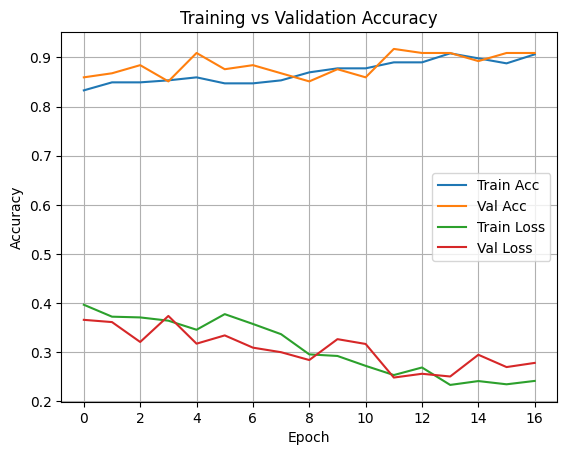

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
    tensorboard_callback
]

with mlflow.start_run(run_name="CNN_Model_With_dropout_and_early_stop"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=test_generator,
        callbacks=callbacks
    )

    model.save("cataract_classifier_with_dropout_and_early_stop.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()